Resizing the REAL and FAKE images to 256x256

In [1]:
import os
import zipfile
from PIL import Image
import numpy as np
import cv2

real_folder = '/Users/siddharthiyer/Desktop/detect ai artwork - resizing images for efficiency/ai vs real art/REAL'
fake_folder = '/Users/siddharthiyer/Desktop/detect ai artwork - resizing images for efficiency/ai vs real art/FAKE'

def gauss_kernel(size, sigma):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    g = np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * (1 / (2.0 * np.pi * sigma**2))
    g /= g.sum() # Normalize
    return g

def subsample(image_array):
    R = image_array[:, :, 0]
    G = image_array[:, :, 1]
    B = image_array[:, :, 2]

    R_sub = R[::2, :]
    G_sub = G[::2, :]
    B_sub = B[::2, :]
    R_sub = R_sub[:, ::2]
    G_sub = G_sub[:, ::2]
    B_sub = B_sub[:, ::2]

    subsampled_array = np.stack([R_sub, G_sub, B_sub], axis=-1)

    return subsampled_array

In [2]:
# Resize images

# Images begin as 512x512. For every image, blur with gauss kernel and convolution code, then subsample to 256x256
# Save the new images in a new folder

blur_kernel = gauss_kernel(5, 1)

real_resized = []
fake_resized = []

for filename in os.listdir(real_folder):
    image = Image.open(real_folder + '/' + filename)
    image = np.array(image)
    image_resized = cv2.filter2D(image, -1, blur_kernel)
    image_resized = subsample(image_resized)
    real_resized.append(image_resized)

for filename in os.listdir(fake_folder):
    image = Image.open(real_folder + '/' + filename)
    image = np.array(image)
    image_resized = cv2.filter2D(image, -1, blur_kernel)
    image_resized = subsample(image_resized)
    fake_resized.append(image_resized)

# Create folders for real and fake resized
# os.mkdir(real_folder + '_resized')
# os.mkdir(fake_folder + '_resized')

# Save images
for i, image in enumerate(real_resized):
    cv2.imwrite(real_folder + '_resized/' + str(i) + '.jpg', image)

for i, image in enumerate(fake_resized):
    cv2.imwrite(fake_folder + '_resized/' + str(i) + '.jpg', image)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/siddharthiyer/Desktop/detect ai artwork - resizing images for efficiency/ai vs real art/REAL'

Simple Convolutional Neural Network Architecture to Predict Real vs. AI Images


In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Found 5456 images belonging to 7 classes.
Found 1364 images belonging to 7 classes.
Epoch 1/10
170/170 [==============================] - 762s 4s/step - loss: -19611795456.0000 - accuracy: 0.0000e+00 - val_loss: -146565365760.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
 20/170 [==>...........................] - ETA: 9:50 - loss: -202139123712.0000 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [10]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 13.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.0/245.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Features shape: torch.Size([3410, 3, 256, 256])
Labels shape: torch.Size([3410])


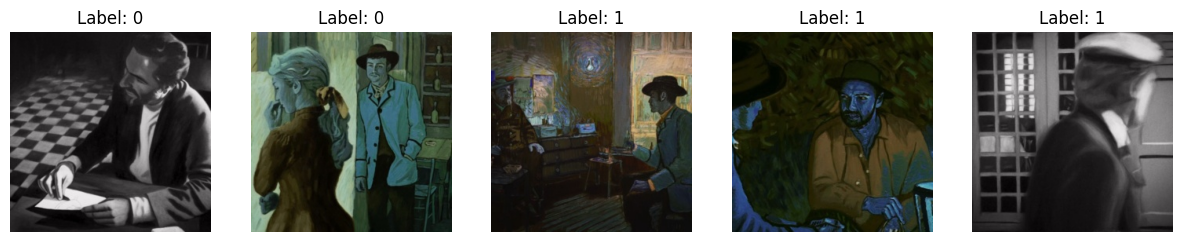

Training set size: 2557
Testing set size: 853


In [63]:
import os
import torch
from torchvision import transforms
from PIL import Image
import random
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Define paths to the folders
fake_folder = "/Users/varunchowdary/Desktop/DSLFinalProject/dsl_final_project_ai_vs_real_art/detect ai artwork - resizing images for efficiency/ai vs real art/FAKE_resized"
real_folder = "/Users/varunchowdary/Desktop/DSLFinalProject/dsl_final_project_ai_vs_real_art/detect ai artwork - resizing images for efficiency/ai vs real art/REAL_resized"

# Define transformations to resize images
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Function to load images and assign labels
def load_images(folder, label):
    dataset = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            img = transform(img)
            dataset.append((img, label))
    return dataset

# Load images and assign labels
fake_data = load_images(fake_folder, 0)
real_data = load_images(real_folder, 1)

# Combine the datasets
dataset = fake_data + real_data

# Shuffle the dataset
random.shuffle(dataset)

# Split into features and labels
features = torch.stack([data[0] for data in dataset])
labels = torch.tensor([data[1] for data in dataset])

# Print the shapes of features and labels
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

# Define a function to display images and labels
def show_images(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        img, label = dataset[i]
        axes[i].imshow(img.permute(1, 2, 0))
        axes[i].set_title("Label: {}".format(label))
        axes[i].axis("off")
    plt.show()

# Display some samples
show_images(dataset)

# Define the size of training and testing sets
train_size = int(0.75 * len(dataset))
test_size = len(dataset) - train_size

# Split dataset into training and testing sets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Define data loaders for training and testing sets
batch_size=7
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print the sizes of training and testing sets
print("Training set size:", len(train_dataset))
print("Testing set size:", len(test_dataset))

In [25]:
train_dataset[0][1]

0

In [21]:

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

batch_size=32
train_d = train_dataset.shuffle(buffer_size=10000).batch(batch_size)
test_d = test_dataset.batch(batch_size)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow(
    directory='/content/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    directory='/content/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)




/Users/varunchowdary/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
# MODEL 2
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 128 * 128, 128)
        self.fc2 = nn.Linear(128, 2)  # Output size 2 for binary classification (fake vs real)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 64 * 128 * 128)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [84]:
import torchvision.models as models
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)


In [90]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1 = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model1.train()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [93]:



num_epochs = 5
for epoch in range(num_epochs):

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        #print(inputs)
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training")

[1, 100] loss: 0.695
[1, 200] loss: 0.694
[1, 300] loss: 0.694
[2, 100] loss: 0.693
[2, 200] loss: 0.693
[2, 300] loss: 0.693
[3, 100] loss: 0.693
[3, 200] loss: 0.693
[3, 300] loss: 0.693
[4, 100] loss: 0.693
[4, 200] loss: 0.693
[4, 300] loss: 0.693
[5, 100] loss: 0.693
[5, 200] loss: 0.693
[5, 300] loss: 0.694
Finished Training


In [94]:
model.eval()  # Set the model to evaluation mode

correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation for efficiency
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the validation set: {accuracy:.2f}%')

Accuracy on the validation set: 49.36%
